In [13]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler #pip install imbalanced-learn
from sklearn.metrics import classification_report

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long','fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
#converting the class variable to binary 0 and 1 (because computers understand binary better)
#print(df['class'].unique())
df['class'] = (df['class'] == 'g').astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

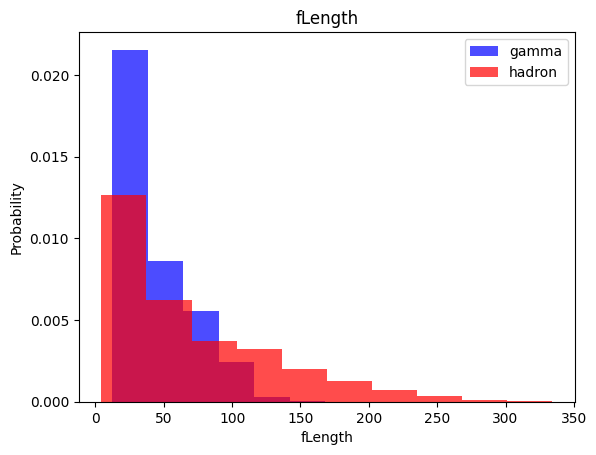

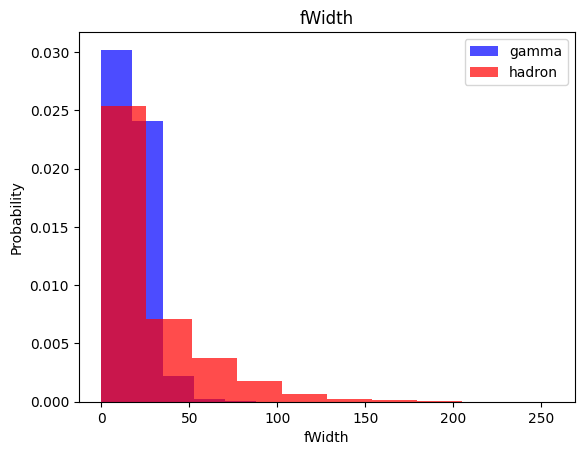

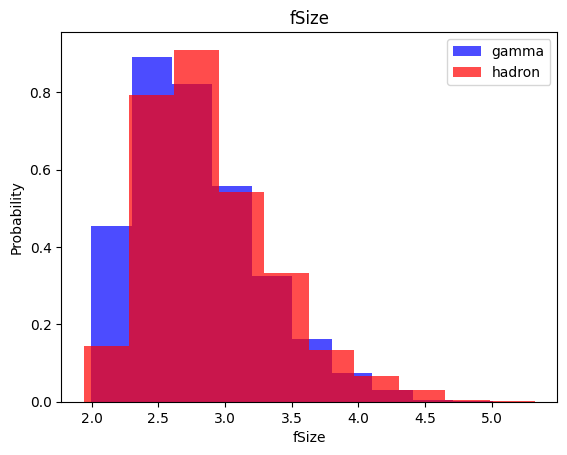

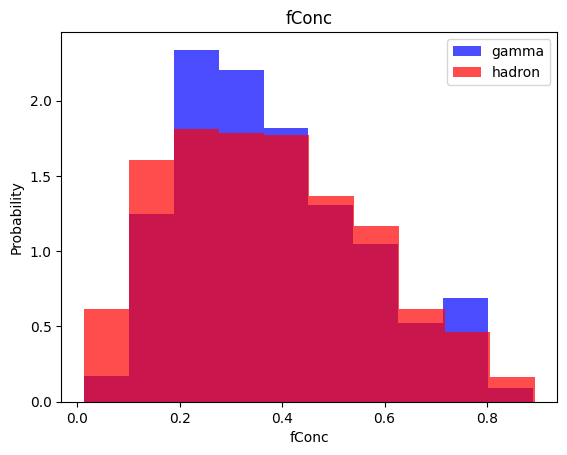

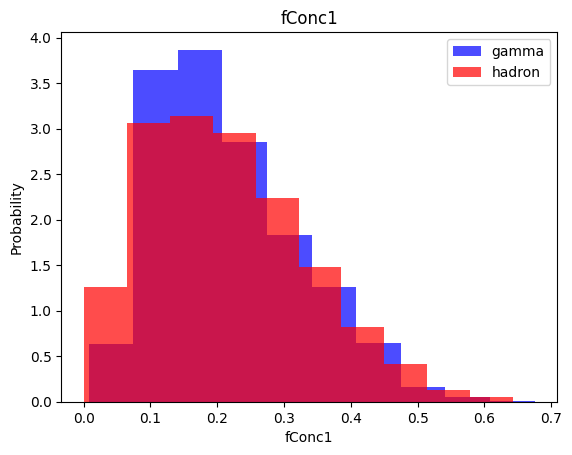

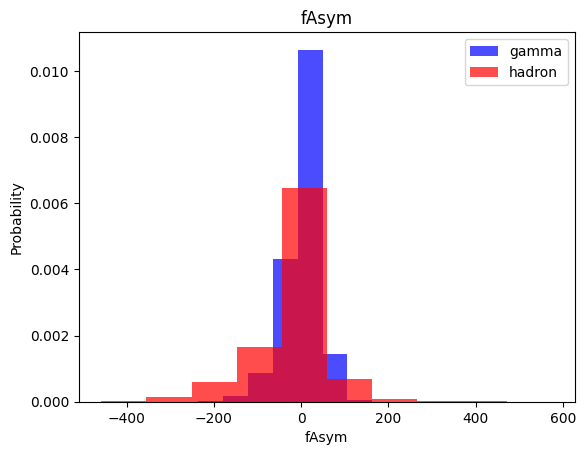

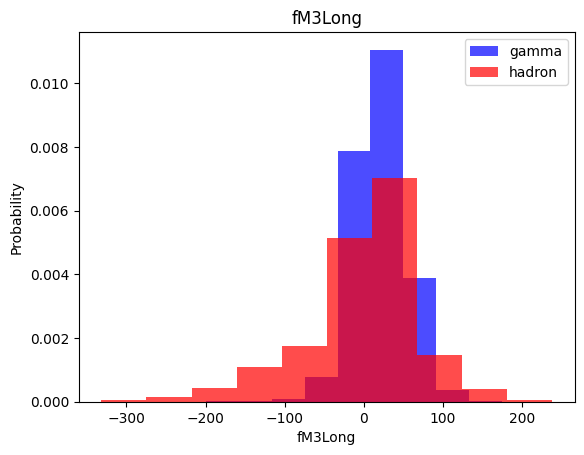

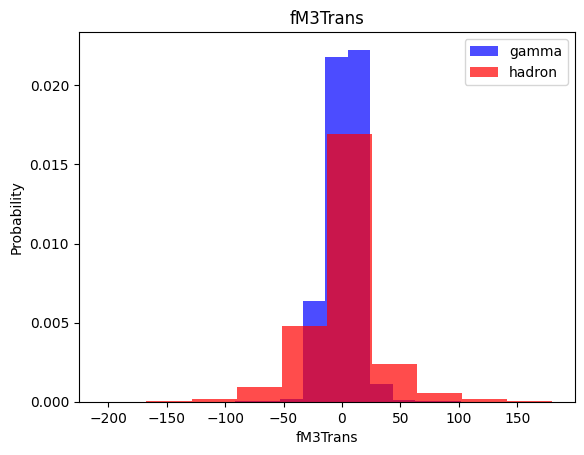

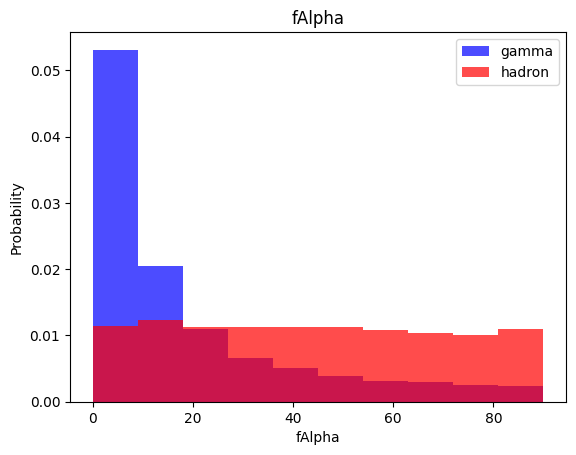

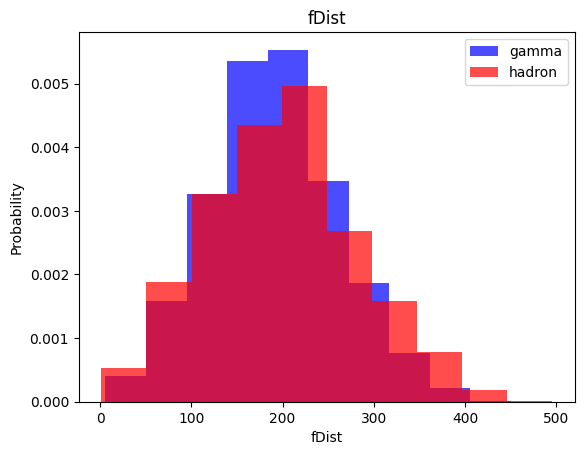

In [4]:
#wisualizing data: how each predictive variable relates to the output (target variable)
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [5]:
#creating the Train, Validation, and Testing spits
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\DrdrA\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
#scaling (or normalizing) so that  the valuess are relative to the mean or standard diviation of column
def scale_ds(dataFrame, oversample=False):
    X = dataFrame[dataFrame.columns[:-1]].values #because the label is in the last column
    y = dataFrame[dataFrame.columns[-1]].values 

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros= RandomOverSampler()
        X, y = ros.fit_resample(X, y) #take more of the less class and keep sampling from there to balance both classes

    data = np.hstack((X, np.reshape(y, (-1, 1)))) #recreate the dataset by stacking new values of X with output y
    return data, X, y

In [7]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7381
4031


In [8]:
train, x_train, y_train = scale_ds(train, oversample=True)
valid, x_valid, y_valid = scale_ds(valid, oversample=False) #since data is unseen, balancing it is not really important
test, x_test, y_test = scale_ds(test, oversample=False)
print(len(y_train))
print(sum(y_train==1))
print(sum(y_train==0))

14762
7381
7381


In [9]:
#Modelisation
#K-Nearest Neighbor
#for data classification, a new point would take the label of the majority of labels near it
#it is calculated with the eucledienne or manhatten distances
#K is determined by how big the dataset is
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [23]:
y_test

array([1, 1, 1, ..., 1, 1, 0])

In [24]:
print(classification_report(y_test, y_pred))
#accuracy : how many did we get right vs how many total are there
#precision : true positive / (true positive + false positive)
#recall : true positive / (false nagative + true postive)
#F1-score: 2(precision*recall)/(precision+recall)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1326
           1       0.87      0.85      0.86      2478

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [25]:
#Model Naive bayes
#Conditional probabilty and bayes rule
#naive bayes in when expand the rules of bayes and apply it for classification (false/true potisive/negative)
from  sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model= nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))
#worse performance because

              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1326
           1       0.74      0.90      0.81      2478

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [27]:
#Model Logistic Regression
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [28]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1326
           1       0.85      0.83      0.84      2478

    accuracy                           0.80      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [29]:
#Model Support Vector Machine (SVM)
#devide the data with a line in a way that makes sense 
#the line is the SVM model
#the issue of SVM is that they're not so robust to outliers
from sklearn.svm import SVC #SVC bc our support vector classifier

svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))
#the best perform

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1326
           1       0.89      0.89      0.89      2478

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [44]:
#Neural Networks
#input features that are weighted and the sum goes to the neuron which adds bias term, and the output goes the activation function which output the results
#the activation function introduces non-linearity to the model
import tensorflow as tf

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='loss')
    ax2.plot(history.history['val_loss'], label='val_loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([#layering
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),#prevent Overfitting: pick up random nodes and don't train them in certain iterations
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    #compile model
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    #train model
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


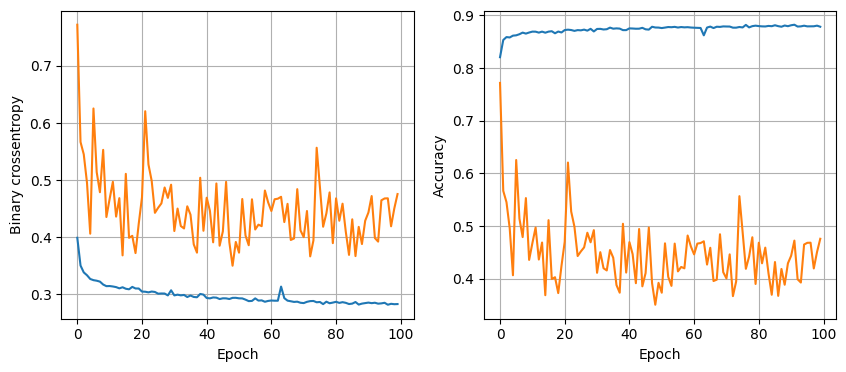

119/119 [==============================] - 0s 991us/step - loss: 0.3331 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.01, batch size 64


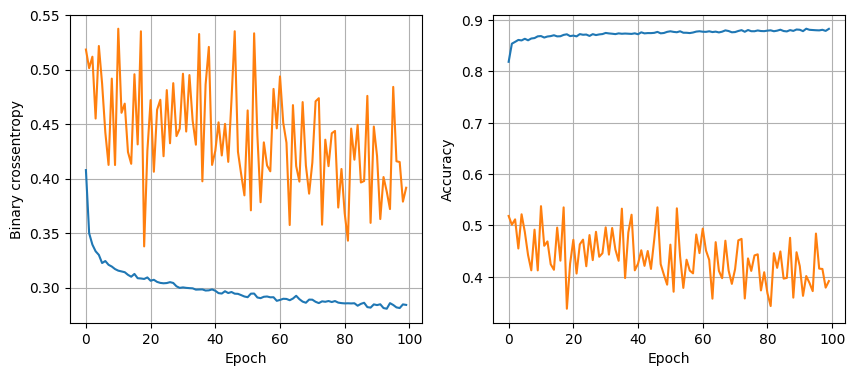

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.01, batch size 128


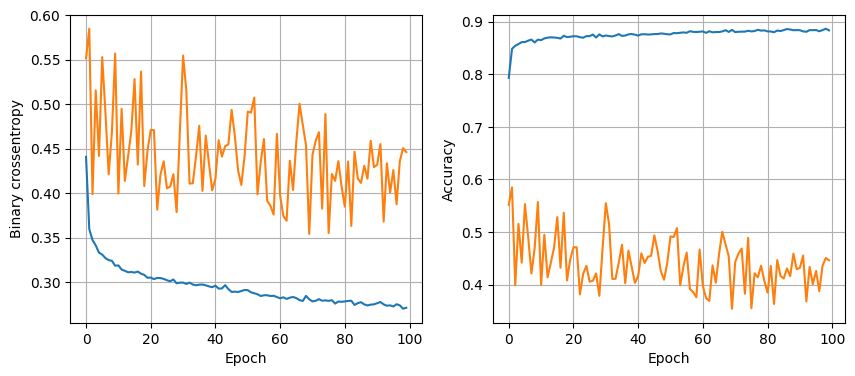

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.005, batch size 32


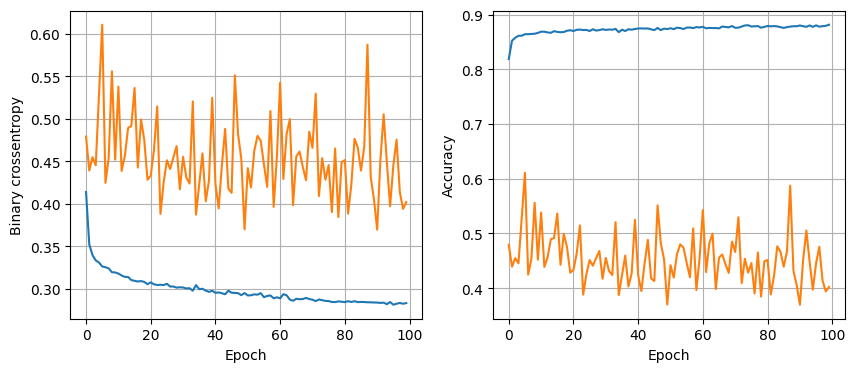

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.005, batch size 64


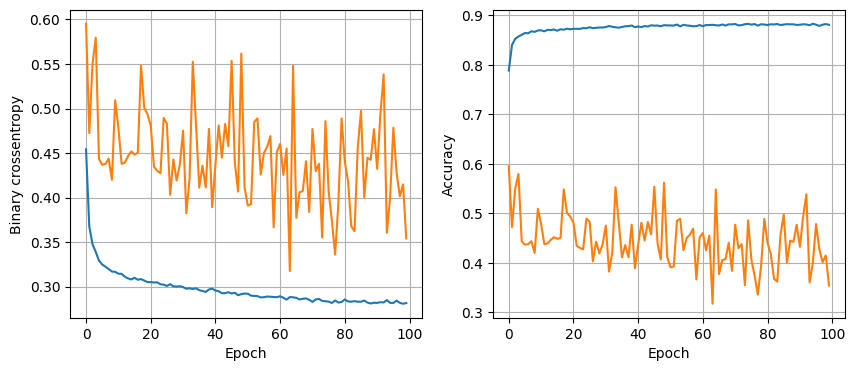

119/119 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8657
16 nodes, dropout 0, lr 0.005, batch size 128


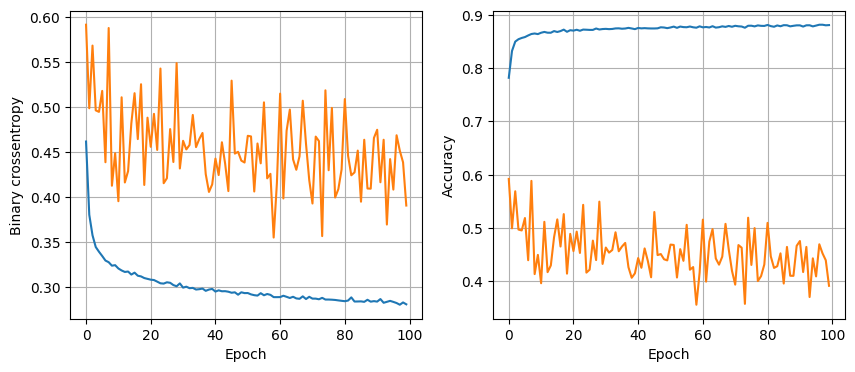

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 32


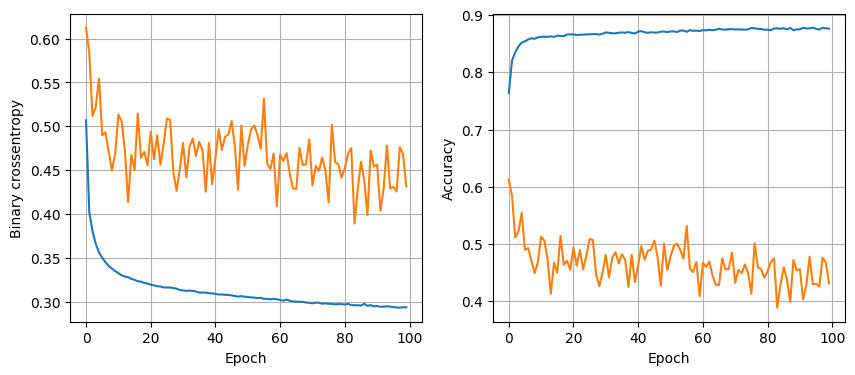

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.001, batch size 64


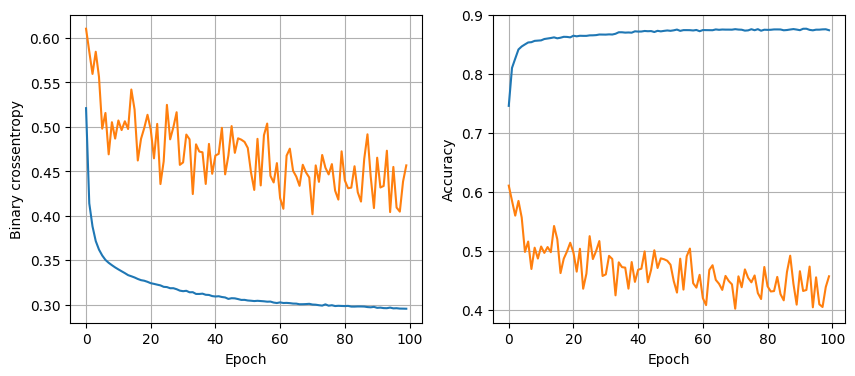

119/119 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8675
16 nodes, dropout 0, lr 0.001, batch size 128


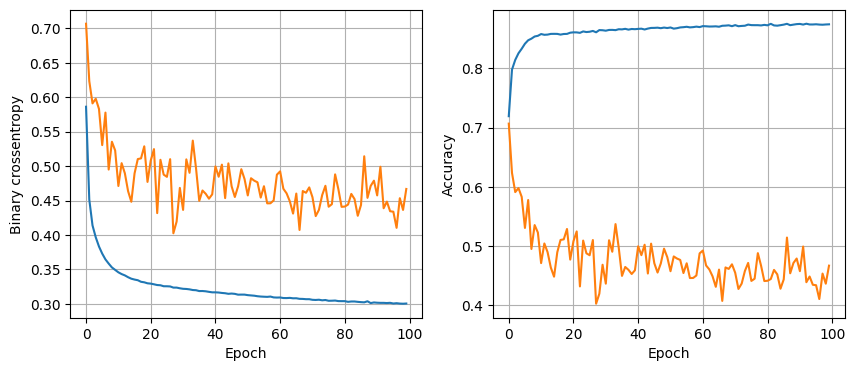

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.01, batch size 32


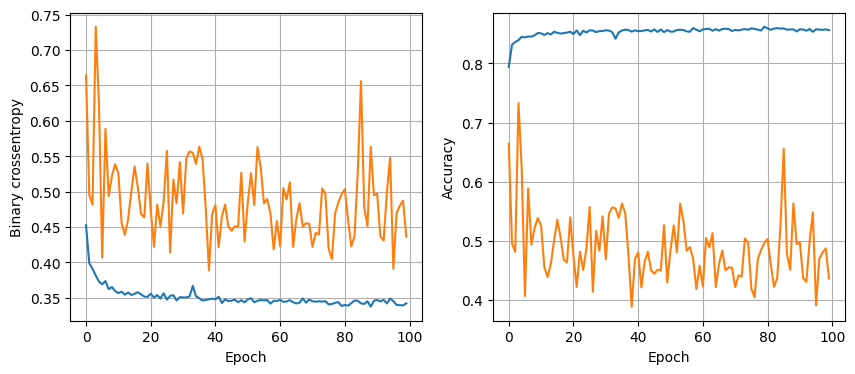

119/119 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8617
16 nodes, dropout 0.2, lr 0.01, batch size 64


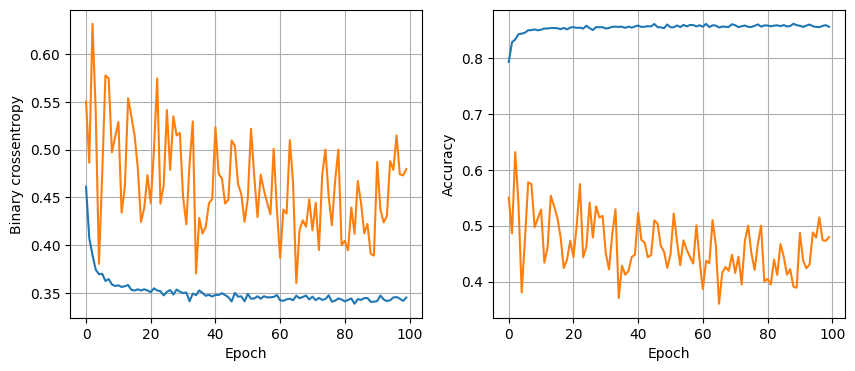

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch size 128


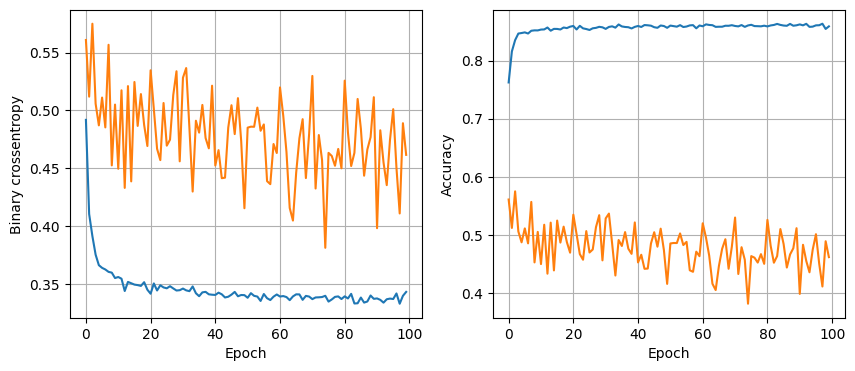

119/119 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.005, batch size 32


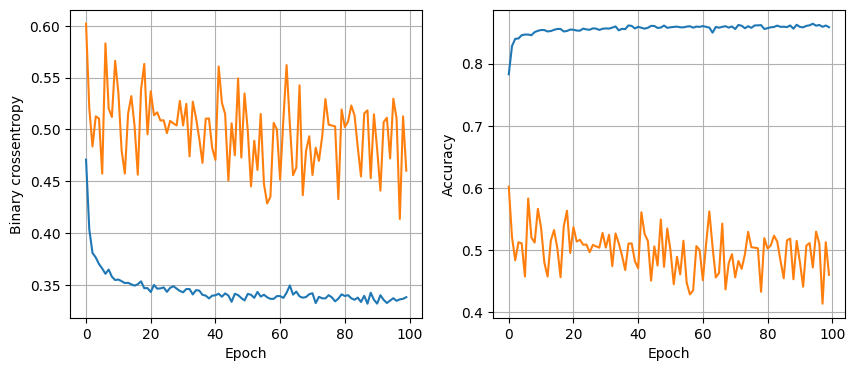

119/119 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.005, batch size 64


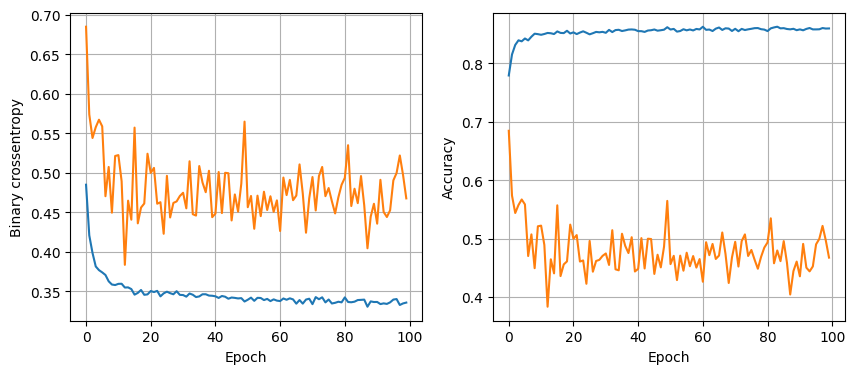

119/119 [==============================] - 0s 1ms/step - loss: 0.3123 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.005, batch size 128


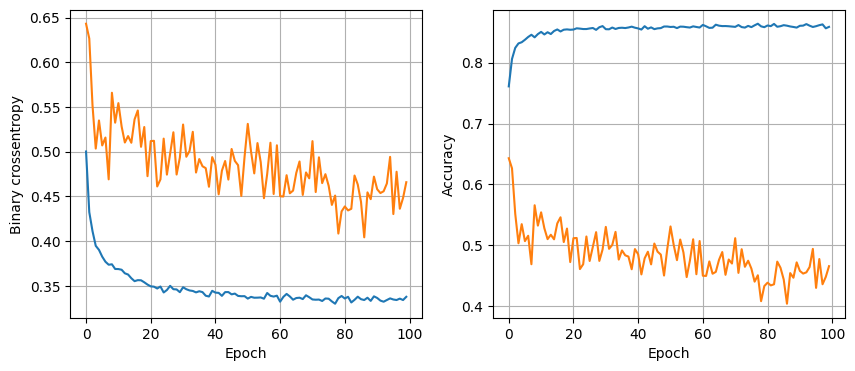

119/119 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8691
16 nodes, dropout 0.2, lr 0.001, batch size 32


119/119 [==============================] - 0s 984us/step - loss: 0.3195 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 64


119/119 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.001, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.01, batch size 32


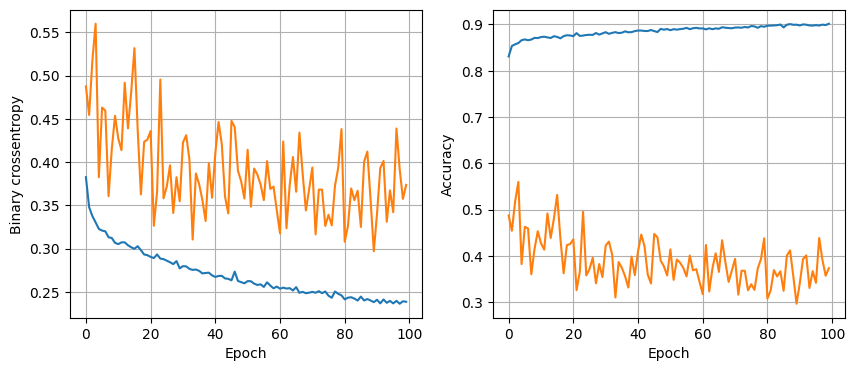

119/119 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.01, batch size 64


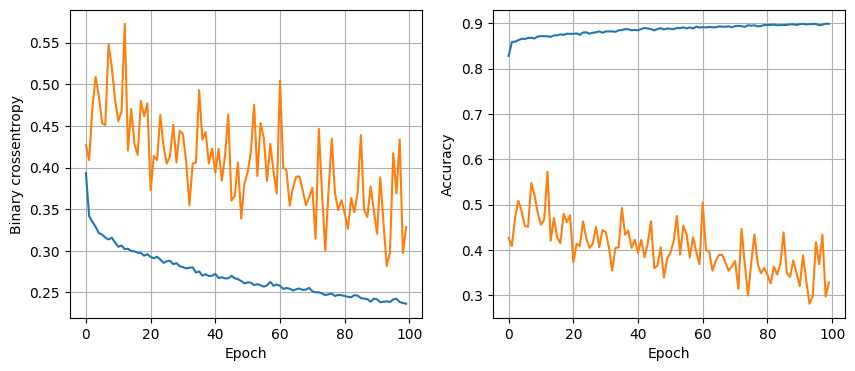

119/119 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.01, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.005, batch size 32


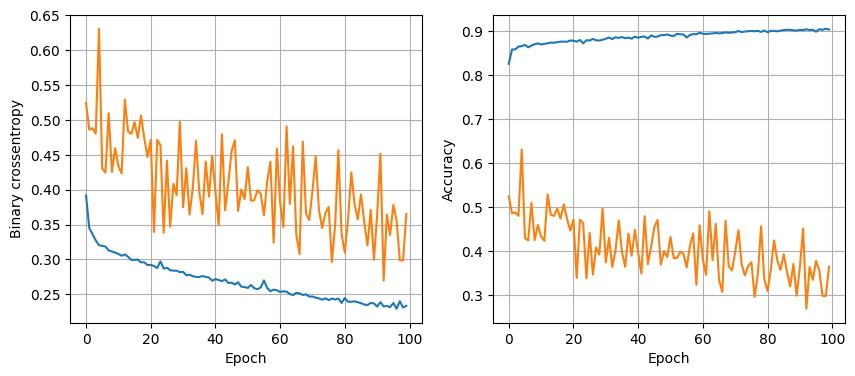

119/119 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.005, batch size 64


119/119 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.005, batch size 128


119/119 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8575
32 nodes, dropout 0, lr 0.001, batch size 32


119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8715
32 nodes, dropout 0, lr 0.001, batch size 64


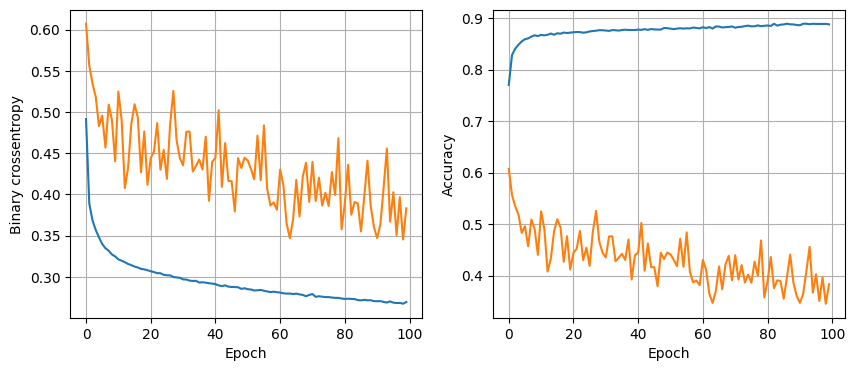

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.001, batch size 128


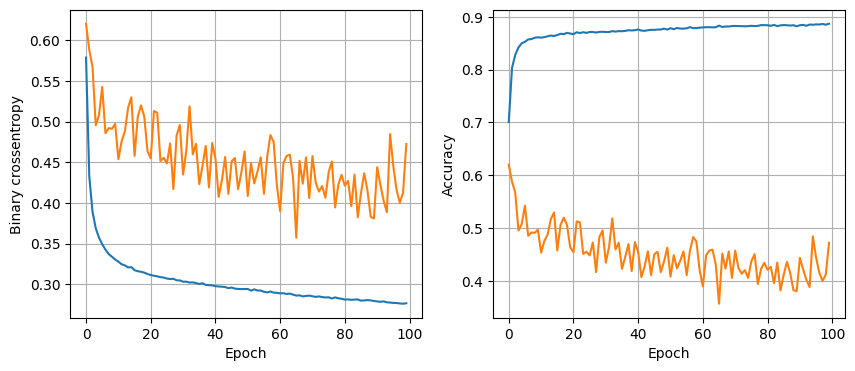

119/119 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 32


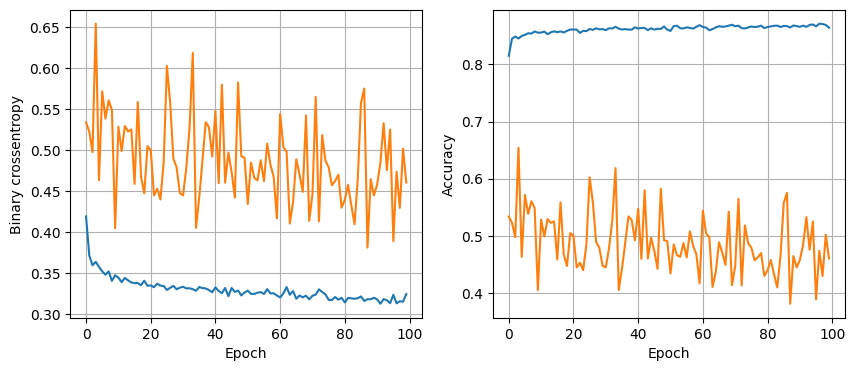

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8720
32 nodes, dropout 0.2, lr 0.01, batch size 64


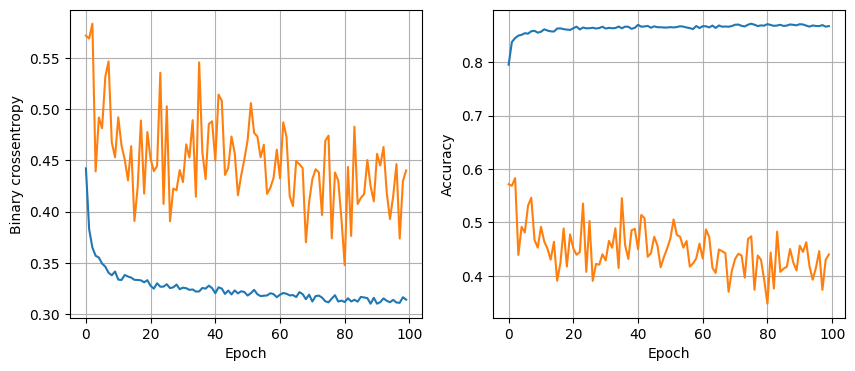

119/119 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.01, batch size 128


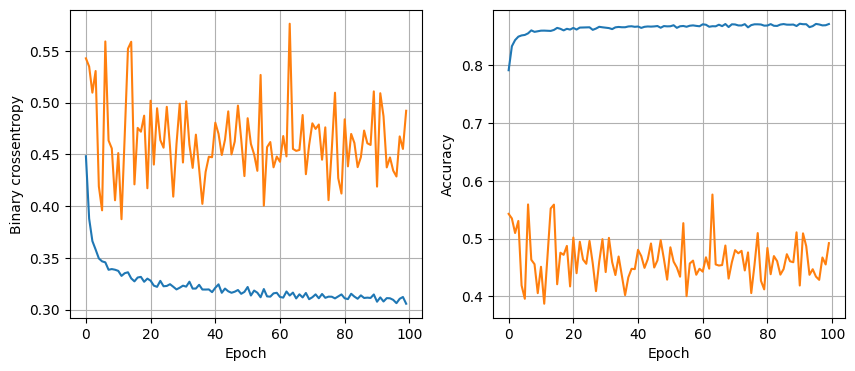

119/119 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.005, batch size 32


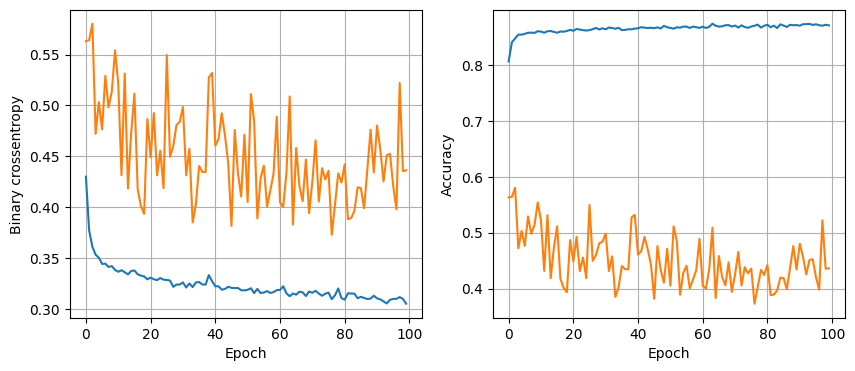

119/119 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.005, batch size 64


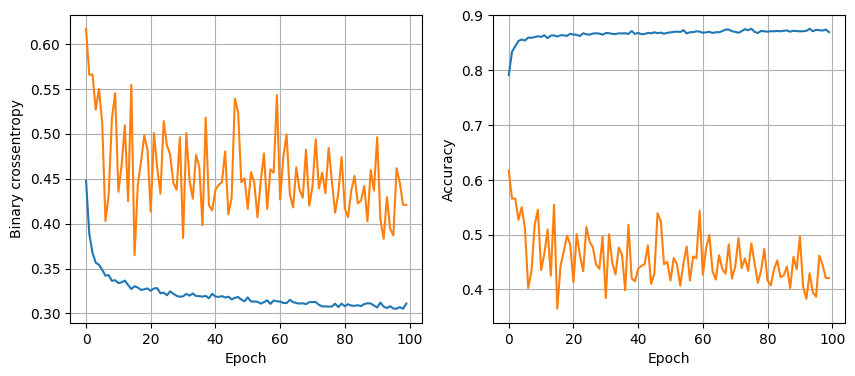

119/119 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.005, batch size 128


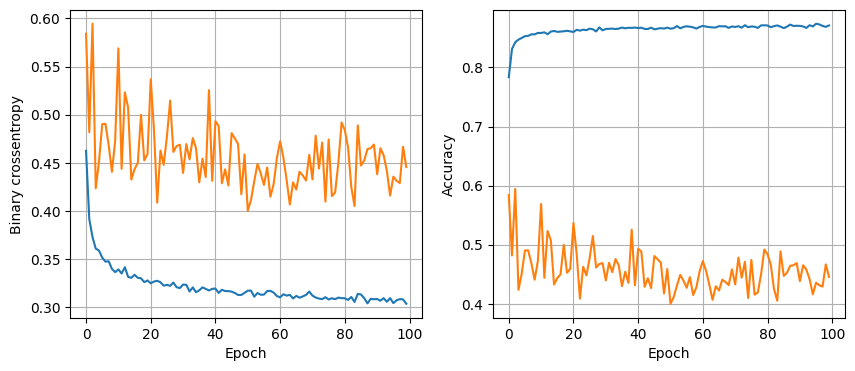

119/119 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.001, batch size 32


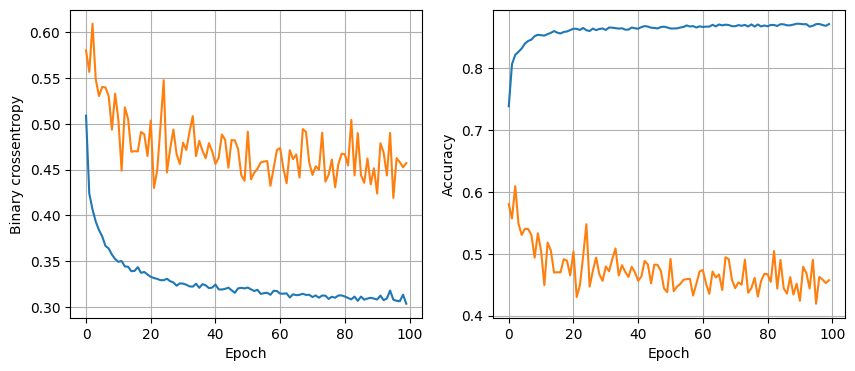

119/119 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.001, batch size 64


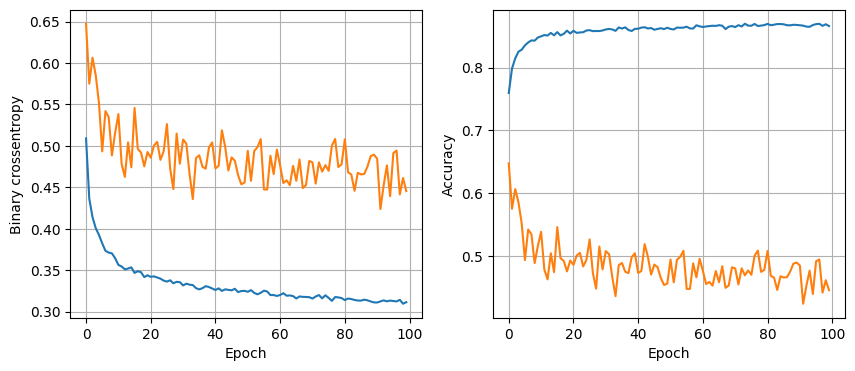

119/119 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.001, batch size 128


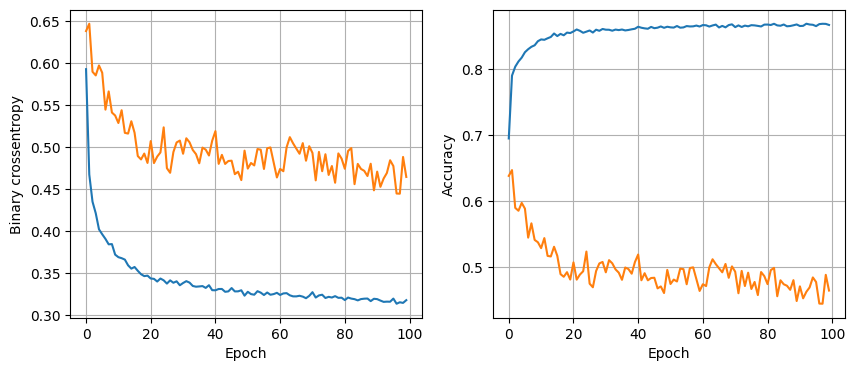

119/119 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.01, batch size 32


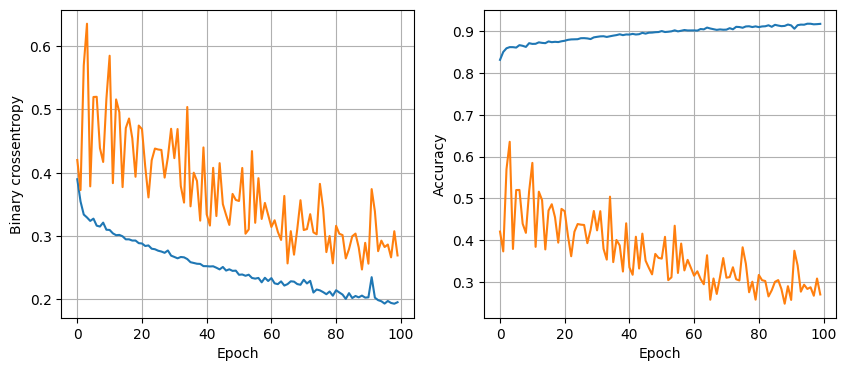

119/119 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.01, batch size 64


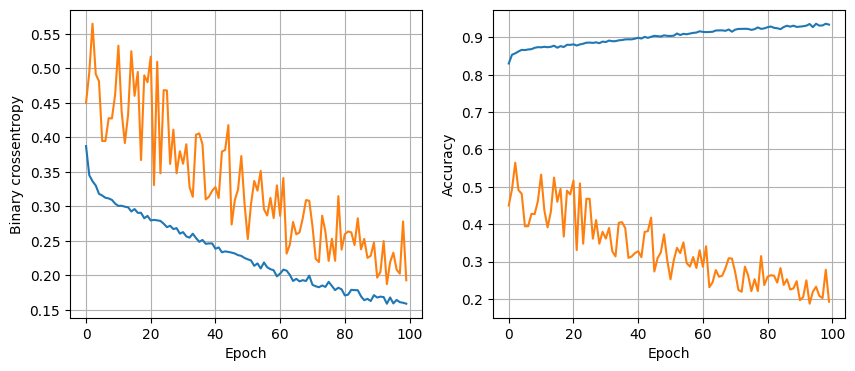

119/119 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8396
64 nodes, dropout 0, lr 0.01, batch size 128


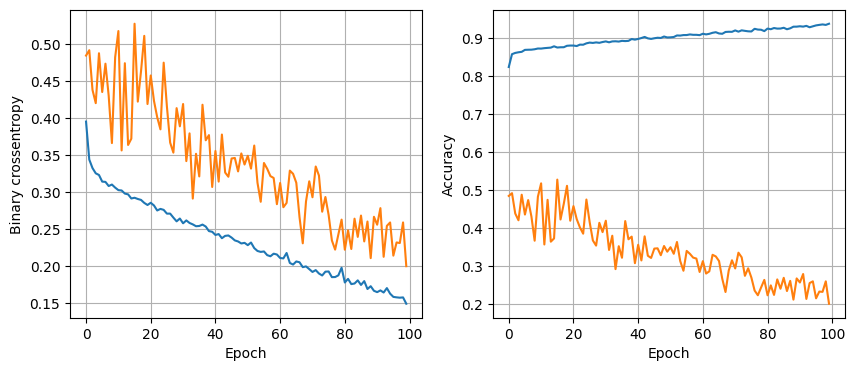

119/119 [==============================] - 0s 1ms/step - loss: 0.5392 - accuracy: 0.8512
64 nodes, dropout 0, lr 0.005, batch size 32


119/119 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.8494
64 nodes, dropout 0, lr 0.005, batch size 64


119/119 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.8467
64 nodes, dropout 0, lr 0.005, batch size 128


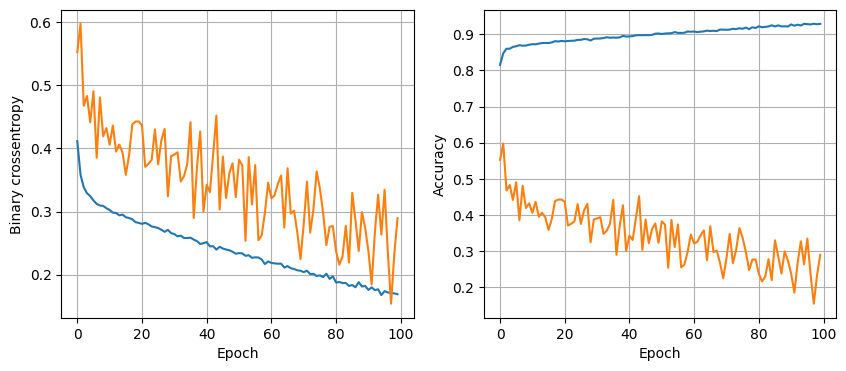

119/119 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8607
64 nodes, dropout 0, lr 0.001, batch size 32


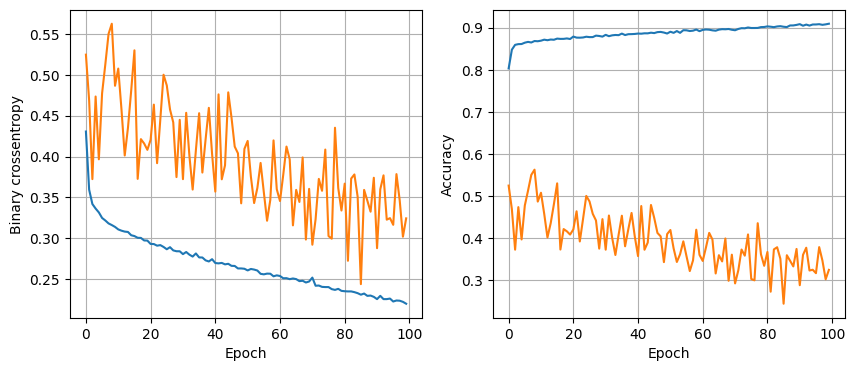

119/119 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.001, batch size 64


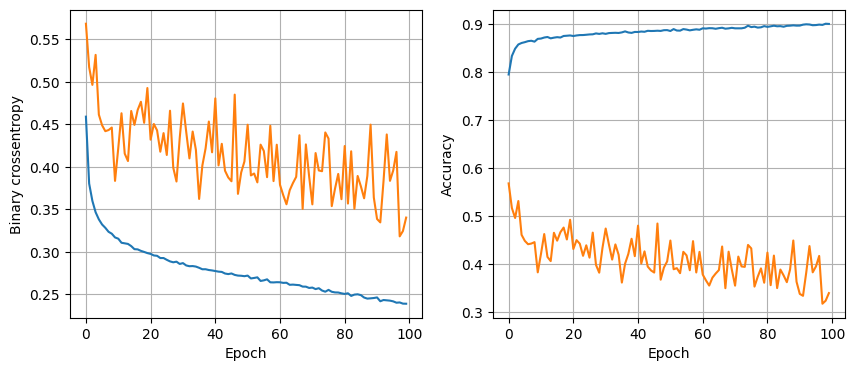

119/119 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.001, batch size 128


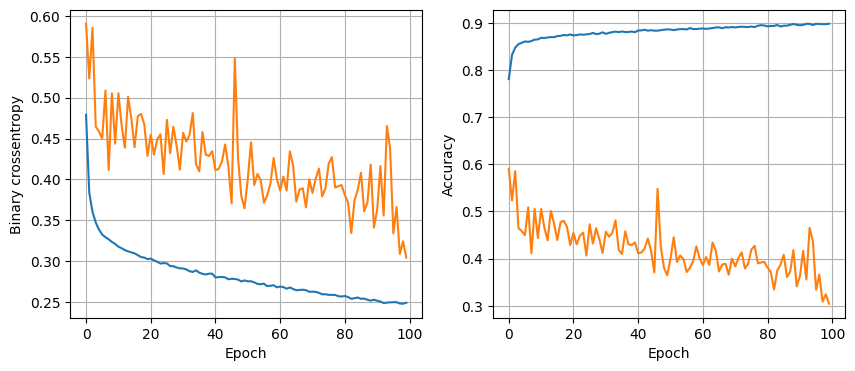

119/119 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8654
64 nodes, dropout 0.2, lr 0.01, batch size 32


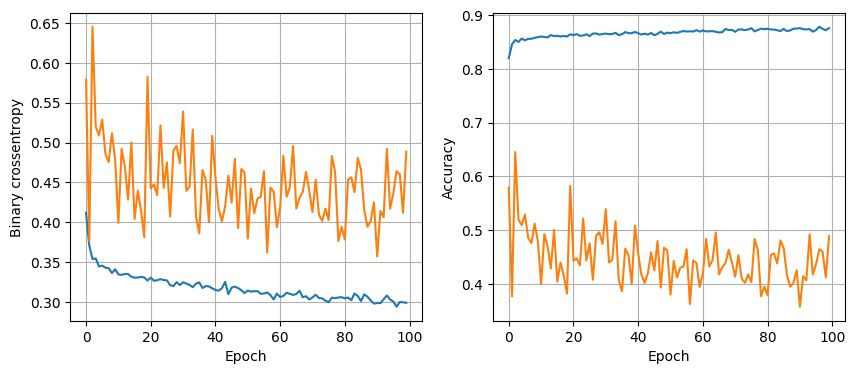

119/119 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8638
64 nodes, dropout 0.2, lr 0.01, batch size 64


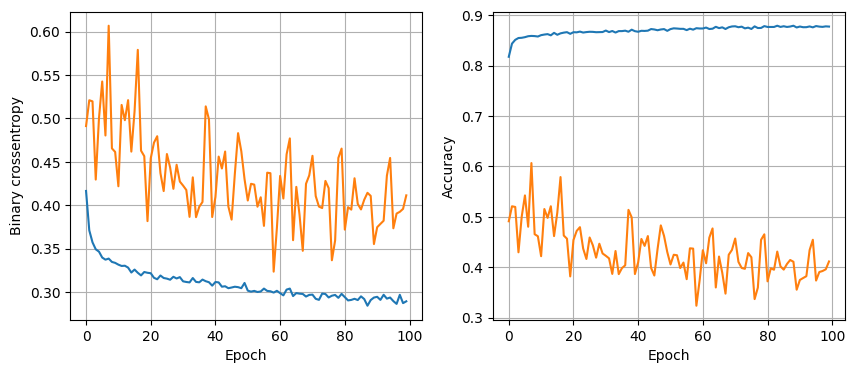

119/119 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.01, batch size 128


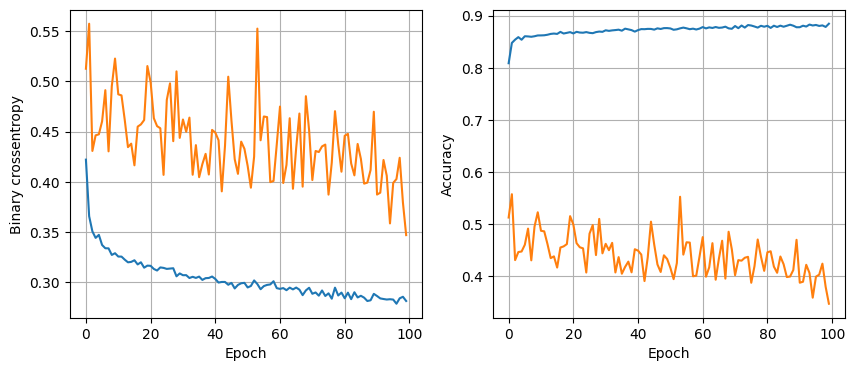

119/119 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.005, batch size 32


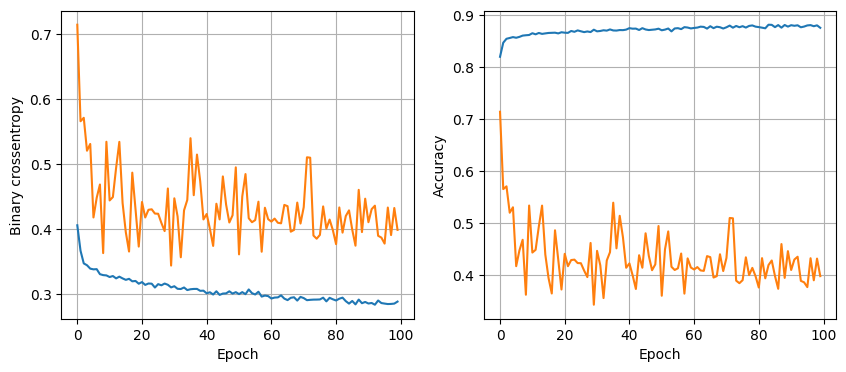

119/119 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.005, batch size 64


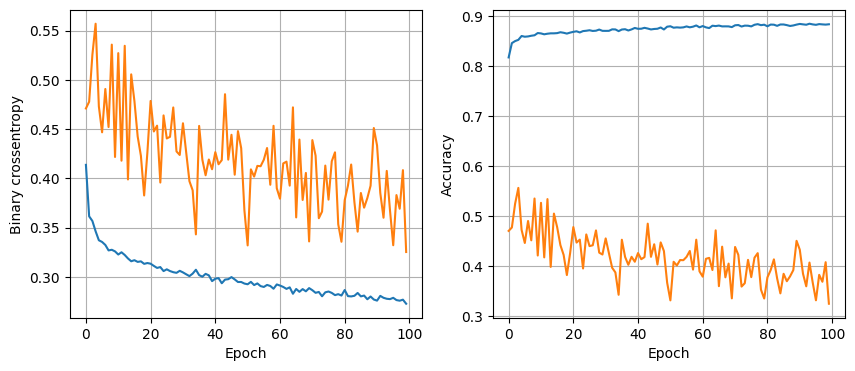

119/119 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8717
64 nodes, dropout 0.2, lr 0.005, batch size 128


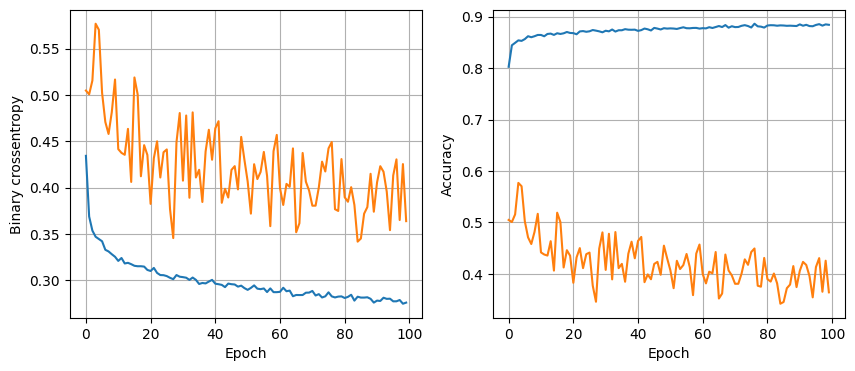

119/119 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.001, batch size 32


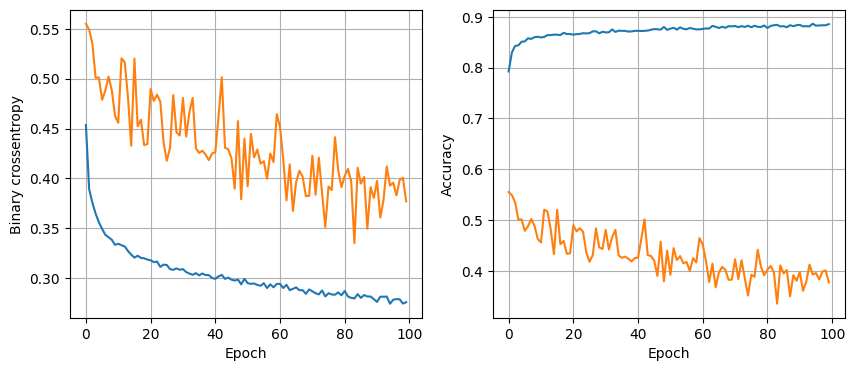

119/119 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8788
64 nodes, dropout 0.2, lr 0.001, batch size 64


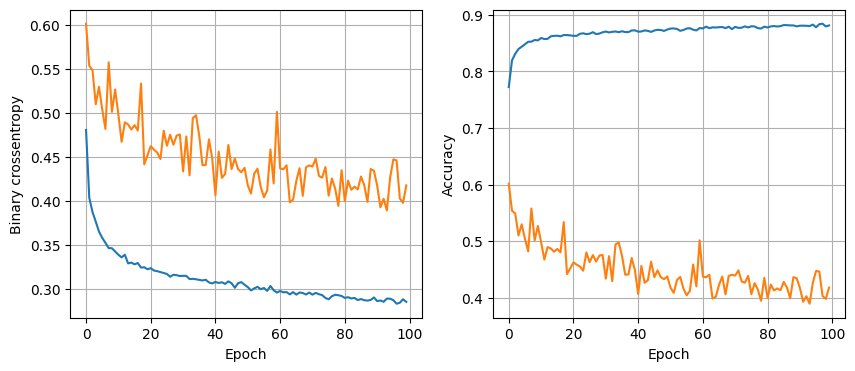

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.001, batch size 128


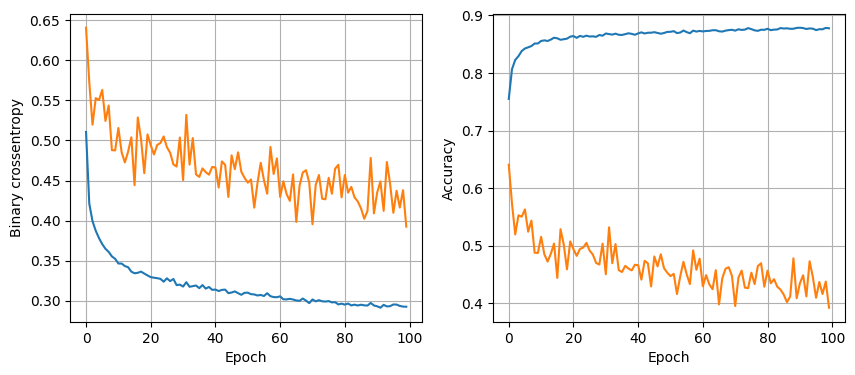

119/119 [==============================] - 0s 1ms/step - loss: 0.3030 - accuracy: 0.8743


In [47]:
#USING GRID SEARCH
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [48]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1326
           1       0.88      0.94      0.91      2478

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.88      0.87      3804

